In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
df_data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'])
df_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [3]:
# 移除Species並取得剩下欄位資料
X = df_data.drop(labels=['Species'],axis=1).values 
y = df_data['Species']

In [4]:
#n_cluster: K的大小，也就是分群的類別數量。
from sklearn.cluster import KMeans
kmeansModel = KMeans(n_clusters=3)
clusters_pred = kmeansModel.fit_predict(X)
y_true = iris.target

/Users/fred0522/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


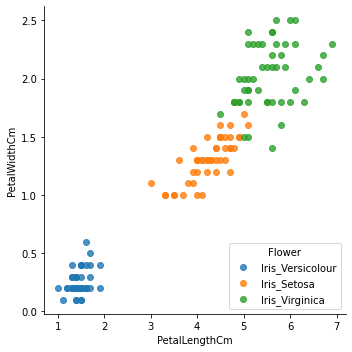

In [5]:
#真實分類
#hue:測面變數的級別順序
sns.lmplot("PetalLengthCm", "PetalWidthCm", hue='Species', data=df_data,fit_reg=False, legend=False)
plt.legend(title='Flower', loc='lower right', labels=['Iris_Versicolour', 'Iris_Setosa', 'Iris_Virginica'])
plt.show()

In [6]:
#Purity指標衡量
import numpy as np
from sklearn import metrics
def purity_score(y_true, clusters_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, clusters_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 
purity_score(y_true, clusters_pred)

0.8933333333333333